<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#优化与深度学习" data-toc-modified-id="优化与深度学习-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>优化与深度学习</a></span></li><li><span><a href="#梯度下降" data-toc-modified-id="梯度下降-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>梯度下降</a></span></li><li><span><a href="#批量梯度下降" data-toc-modified-id="批量梯度下降-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>批量梯度下降</a></span></li><li><span><a href="#动量法" data-toc-modified-id="动量法-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>动量法</a></span></li><li><span><a href="#adagrad" data-toc-modified-id="adagrad-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>adagrad</a></span></li><li><span><a href="#RMSProp" data-toc-modified-id="RMSProp-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RMSProp</a></span></li><li><span><a href="#AdaDelta" data-toc-modified-id="AdaDelta-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>AdaDelta</a></span></li><li><span><a href="#Adam" data-toc-modified-id="Adam-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Adam</a></span></li></ul></div>

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

from ch07_linear_regression import LinRegScratch, LinRegGluon
from common.data_sets import load_airfoil_data

display.set_matplotlib_formats("svg")

def set_figure_size(figsize=(3.5, 2.5)):
    plt.rcParams["figure.figsize"] = figsize

#### 优化与深度学习

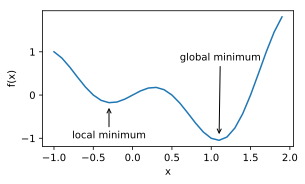

In [2]:
def local_min_func(x):
    return x * np.cos(np.pi * x)

x = np.arange(-1.0, 2.0, 0.1)
set_figure_size((4.5, 2.5))
fig, = plt.plot(x, local_min_func(x))
plt.xlabel("x")
plt.ylabel("f(x)")
fig.axes.annotate("local minimum", xy=(-0.3, -0.25), xytext=(-0.77, -1.0), arrowprops=dict(arrowstyle="->"))
fig.axes.annotate("global minimum", xy=(1.1, -0.95), xytext=(0.6, 0.8), arrowprops=dict(arrowstyle="->"))
plt.show()

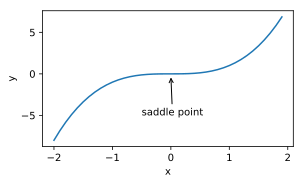

In [3]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = plt.plot(x, x**3)
fig.axes.annotate("saddle point", xy=(0, -0.2), xytext=(-0.5, -5.0), arrowprops=dict(arrowstyle="->"))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/Users/guoqian05/miniconda3/envs/gluon/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


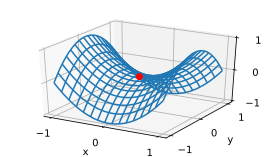

In [4]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x, y, z, **{"rstride": 2, "cstride": 2})
ax.plot([0], [0], "ro")
ticks = [-1, 0, 1]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()

#### 梯度下降

In [5]:
from mxnet import nd

In [6]:
def gradient_descent(eta, start_point=10, epochs=10,
                     x_range=(-10, 10),
                     func=lambda x: x**2, 
                     grad_func=lambda x: 2*x,
                     symetric=True):
    assert len(x_range) == 2
    
    x = start_point
    trace_x = [x]
    for epoch in range(epochs):
        x -= eta * grad_func(x)
        trace_x.append(x)
    trace_y = [func(p) for p in trace_x]
    
    if symetric:
        x_max = max(abs(x_range[0]), abs(x_range[1]), abs(max(trace_x)))
        x = np.arange(-x_max, x_max, 0.1)
    else:
        x_min = min(x_range[0], min(trace_x))
        x_max = max(x_range[1], max(trace_y))
        x =  np.arange(x_min, x_max, 0.1)
    y = func(x)
    
    return x, y, trace_x, trace_y

In [7]:
def show_trace(x, y, trace_x, trace_y):
    plt.plot(x, y)
    plt.plot(trace_x, trace_y, "-o")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

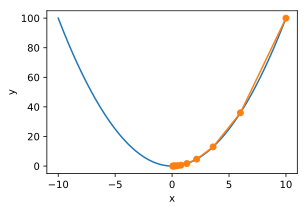

In [8]:
set_figure_size((4.5, 3))
x, y, trace_x, trace_y = gradient_descent(eta=0.2)
show_trace(x, y, trace_x, trace_y)

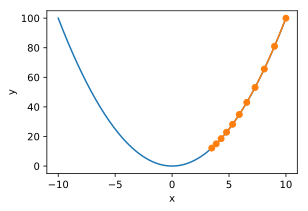

In [9]:
x, y, trace_x, trace_y = gradient_descent(eta=0.05)
show_trace(x, y, trace_x, trace_y)

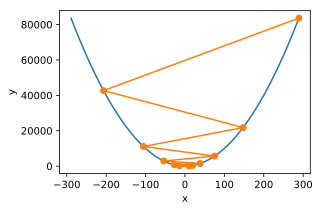

In [10]:
x, y, trace_x, trace_y = gradient_descent(eta=1.2)
show_trace(x, y, trace_x, trace_y)

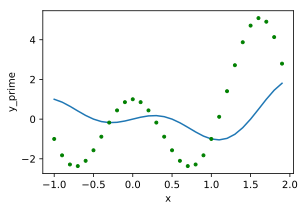

In [11]:
def local_min_func_grad(x):
    return np.cos(np.pi * x) - np.pi * x * np.sin(np.pi * x)

x = np.arange(-1.0, 2.0, 0.1)
y = local_min_func(x)
y_prime = local_min_func_grad(x)
plt.plot(x, y)
plt.plot(x, y_prime, "g.")
plt.xlabel("x")
plt.ylabel("y_prime")
plt.show()

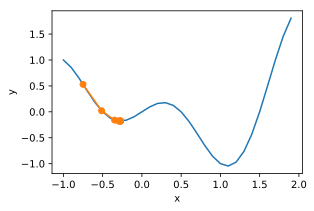

In [12]:
x, y, trace_x, trace_y = gradient_descent(eta=0.1, 
                                          start_point=-0.75,
                                          x_range=(-1.0, 2.0),
                                          func=local_min_func, 
                                          grad_func=local_min_func_grad,
                                          symetric=False)
show_trace(x, y, trace_x, trace_y)

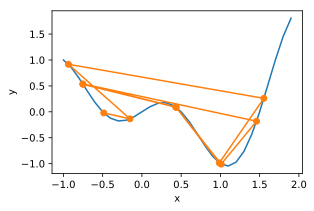

In [13]:
x, y, trace_x, trace_y = gradient_descent(eta=0.5, 
                                          start_point=-0.75,
                                          x_range=(-1.0, 2.0),
                                          func=local_min_func, 
                                          grad_func=local_min_func_grad,
                                          symetric=False)
show_trace(x, y, trace_x, trace_y)

In [14]:
def train_2d(trainer, start_point=(-5, -2, 0, 0), epochs=20):
    x1, x2, s1, s2 = start_point
    traces = [(x1, x2)]
    for epoch in range(epochs):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        traces.append((x1, x2))
    return traces

def show_trace_2d(func, traces, x1_range=(-5.5, 1.0), x2_range=(-3.0, 1)):
    x1, x2 = np.meshgrid(np.arange(x1_range[0], x1_range[1], 0.1), np.arange(x2_range[0], x2_range[1], 0.1))
    plt.contour(x1, x2, func(x1, x2), colors="#1f77b4")
    plt.plot(*zip(*traces), '-o', color="#ff7f0e")
    plt.xlim(x1_range)
    plt.ylim(x2_range)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [15]:
def f_2d(x1, x2):
    return x1**2 + 2 * x2**2
def gd_2d(x1, x2, s1, s2):
    return x1 - 0.1 * 2 * x1, x2 - 0.1 * 4 * x2, None, None

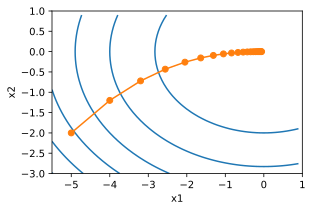

In [16]:
show_trace_2d(f_2d, train_2d(gd_2d))

In [17]:
def sgd_2d(x1, x2, s1, s2):
    return x1 - 0.1 * (2 * x1 + np.random.normal(0.1)), x2 - 0.1 * (4 * x2 + np.random.normal(0.1)), None, None

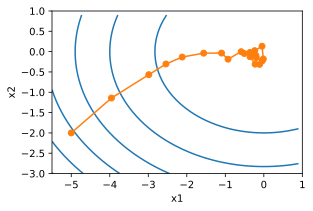

In [18]:
show_trace_2d(f_2d, train_2d(sgd_2d))

#### 批量梯度下降

In [19]:
features, labels = load_airfoil_data()
features = features[:1500]
labels = labels[:1500]

In [20]:
def train_sgd(model, optimizer, hyper_params, batch_size, epochs=10):
    history = model.fit(features, labels, optimizer, hyper_params, batch_size=batch_size, epochs=epochs)
    history = [item[0] for item in history]
    plt.plot(np.arange(epochs), history)
    plt.xlabel("epoch")
    plt.ylabel("loss")

epoch 1 - train_loss: 0.7888348698616028
epoch 2 - train_loss: 0.5137194991111755
epoch 3 - train_loss: 0.39541947841644287
epoch 4 - train_loss: 0.3359547257423401
epoch 5 - train_loss: 0.30299293994903564
epoch 6 - train_loss: 0.28329116106033325
epoch 7 - train_loss: 0.2707827389240265
epoch 8 - train_loss: 0.2624576985836029
epoch 9 - train_loss: 0.2567186951637268
epoch 10 - train_loss: 0.2526625096797943


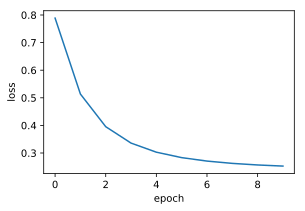

In [21]:
scratch_model = LinRegScratch()
train_sgd(scratch_model, "sgd", {"learning_rate":0.8}, 1500, 10)

epoch 1 - train_loss: 0.7381836771965027
epoch 2 - train_loss: 0.4104125201702118
epoch 3 - train_loss: 0.3306448757648468
epoch 4 - train_loss: 0.29361891746520996
epoch 5 - train_loss: 0.27236971259117126
epoch 6 - train_loss: 0.25947779417037964
epoch 7 - train_loss: 0.25249192118644714
epoch 8 - train_loss: 0.24803344905376434
epoch 9 - train_loss: 0.24555884301662445
epoch 10 - train_loss: 0.24403706192970276


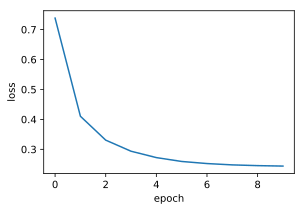

In [22]:
train_sgd(scratch_model, "sgd", {"learning_rate": 0.1}, 100, 10)

epoch 1 - train_loss: 0.3013937473297119
epoch 2 - train_loss: 0.25838837027549744
epoch 3 - train_loss: 0.24805863201618195
epoch 4 - train_loss: 0.24509263038635254
epoch 5 - train_loss: 0.24392053484916687
epoch 6 - train_loss: 0.2432776242494583
epoch 7 - train_loss: 0.24285133183002472
epoch 8 - train_loss: 0.24254675209522247
epoch 9 - train_loss: 0.24232365190982819
epoch 10 - train_loss: 0.2421589493751526


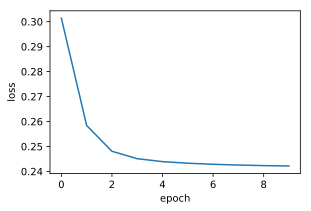

In [23]:
gluon_model = LinRegGluon()
train_sgd(gluon_model, "sgd", {"learning_rate":0.8}, 1500, 10)

epoch 1 - train_loss: 0.36795976758003235
epoch 2 - train_loss: 0.3086600601673126
epoch 3 - train_loss: 0.27821084856987
epoch 4 - train_loss: 0.2624061405658722
epoch 5 - train_loss: 0.2540687620639801
epoch 6 - train_loss: 0.2495572566986084
epoch 7 - train_loss: 0.24702657759189606
epoch 8 - train_loss: 0.24553951621055603
epoch 9 - train_loss: 0.2446165233850479
epoch 10 - train_loss: 0.24400927126407623
epoch 11 - train_loss: 0.24358679354190826
epoch 12 - train_loss: 0.24327823519706726
epoch 13 - train_loss: 0.24304400384426117
epoch 14 - train_loss: 0.24286095798015594
epoch 15 - train_loss: 0.24271488189697266
epoch 16 - train_loss: 0.2425965964794159
epoch 17 - train_loss: 0.24249981343746185
epoch 18 - train_loss: 0.24242006242275238
epoch 19 - train_loss: 0.24235396087169647
epoch 20 - train_loss: 0.24229897558689117
epoch 21 - train_loss: 0.24225305020809174
epoch 22 - train_loss: 0.242214635014534
epoch 23 - train_loss: 0.2421824336051941
epoch 24 - train_loss: 0.2421553

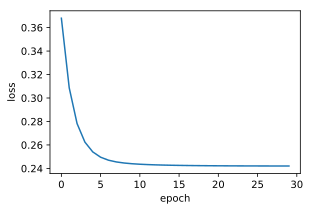

In [24]:
train_sgd(gluon_model, "sgd", {"learning_rate": 0.05}, 150, 30)

#### 动量法

In [25]:
eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1**2 + 2 * x2**2

def gd_2d(x1, x2, s1, s2):
    return x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0

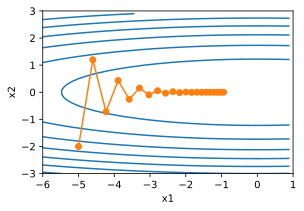

In [26]:
show_trace_2d(f_2d, train_2d(gd_2d), x1_range=(-6, 1), x2_range=(-3, 3))

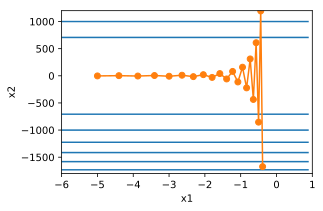

In [27]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d, epochs=20), x1_range=(-6, 1), x2_range=(-1800, 1200))

In [28]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gmma * v1 + eta * 0.2 * x1
    v2 = gmma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

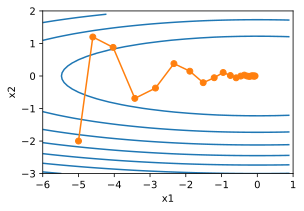

In [29]:
eta, gmma = 0.4, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d), x1_range=(-6, 1), x2_range=(-3, 2))

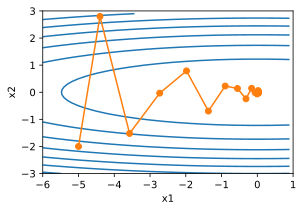

In [30]:
eta = 0.6
show_trace_2d(f_2d, train_2d(momentum_2d), x1_range=(-6, 1), x2_range=(-3, 3))

epoch 1 - train_loss: 4.8216047286987305
epoch 2 - train_loss: 3.177628517150879
epoch 3 - train_loss: 2.201265573501587
epoch 4 - train_loss: 1.5877017974853516
epoch 5 - train_loss: 1.185078501701355
epoch 6 - train_loss: 0.912179708480835
epoch 7 - train_loss: 0.7229199409484863
epoch 8 - train_loss: 0.5894596576690674
epoch 9 - train_loss: 0.4946630001068115
epoch 10 - train_loss: 0.4265460968017578
epoch 11 - train_loss: 0.37705111503601074
epoch 12 - train_loss: 0.34122398495674133
epoch 13 - train_loss: 0.31534335017204285
epoch 14 - train_loss: 0.2963489592075348
epoch 15 - train_loss: 0.2824043035507202
epoch 16 - train_loss: 0.27212706208229065
epoch 17 - train_loss: 0.2645106613636017
epoch 18 - train_loss: 0.2588779032230377
epoch 19 - train_loss: 0.25470614433288574
epoch 20 - train_loss: 0.2515884339809418
epoch 21 - train_loss: 0.24925559759140015
epoch 22 - train_loss: 0.24749548733234406
epoch 23 - train_loss: 0.2461915761232376
epoch 24 - train_loss: 0.245186910033226

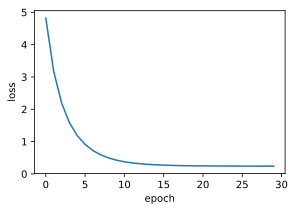

In [31]:
train_sgd(scratch_model, "momentum", {"learning_rate": 0.02, "momentum": 0.5}, 150, 30)

epoch 1 - train_loss: 1.1270549297332764
epoch 2 - train_loss: 0.8889556527137756
epoch 3 - train_loss: 0.7186645269393921
epoch 4 - train_loss: 0.5951896905899048
epoch 5 - train_loss: 0.5050879716873169
epoch 6 - train_loss: 0.43865346908569336
epoch 7 - train_loss: 0.3895079791545868
epoch 8 - train_loss: 0.35303255915641785
epoch 9 - train_loss: 0.3257432281970978
epoch 10 - train_loss: 0.3052998483181
epoch 11 - train_loss: 0.28986993432044983
epoch 12 - train_loss: 0.2782641649246216
epoch 13 - train_loss: 0.2694839537143707
epoch 14 - train_loss: 0.2628077268600464
epoch 15 - train_loss: 0.25775307416915894
epoch 16 - train_loss: 0.25394099950790405
epoch 17 - train_loss: 0.2510344088077545
epoch 18 - train_loss: 0.24881848692893982
epoch 19 - train_loss: 0.2471265196800232
epoch 20 - train_loss: 0.24584639072418213
epoch 21 - train_loss: 0.24487638473510742
epoch 22 - train_loss: 0.2441236823797226
epoch 23 - train_loss: 0.24355272948741913
epoch 24 - train_loss: 0.243109539151

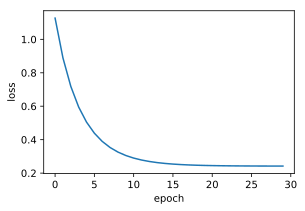

In [32]:
train_sgd(scratch_model, "momentum", {"learning_rate": 0.02, "momentum": 0.9}, 150, 30)

epoch 1 - train_loss: 4.642082214355469
epoch 2 - train_loss: 3.4313392639160156
epoch 3 - train_loss: 2.6014509201049805
epoch 4 - train_loss: 2.0215747356414795
epoch 5 - train_loss: 1.608479619026184
epoch 6 - train_loss: 1.308146357536316
epoch 7 - train_loss: 1.0865716934204102
epoch 8 - train_loss: 0.9200387597084045
epoch 9 - train_loss: 0.7928863167762756
epoch 10 - train_loss: 0.6945960521697998
epoch 11 - train_loss: 0.6177215576171875
epoch 12 - train_loss: 0.5568744540214539
epoch 13 - train_loss: 0.5083584189414978
epoch 14 - train_loss: 0.46935343742370605
epoch 15 - train_loss: 0.43780574202537537
epoch 16 - train_loss: 0.41197705268859863
epoch 17 - train_loss: 0.390801340341568
epoch 18 - train_loss: 0.3732471466064453
epoch 19 - train_loss: 0.3586634397506714
epoch 20 - train_loss: 0.34641316533088684
epoch 21 - train_loss: 0.3360920250415802
epoch 22 - train_loss: 0.32729944586753845
epoch 23 - train_loss: 0.31979453563690186
epoch 24 - train_loss: 0.3133268654346466

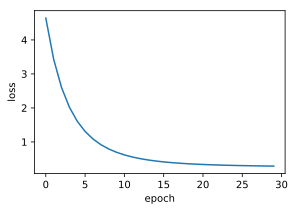

In [33]:
train_sgd(scratch_model, "momentum", {"learning_rate": 0.004, "momentum": 0.9}, 50, 30)

#### adagrad

In [34]:
import math
def adagrad_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

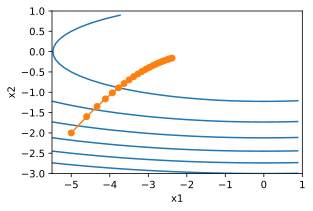

In [35]:
eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

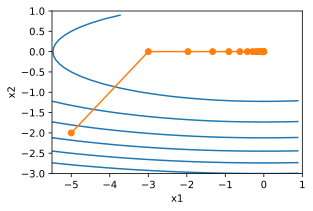

In [36]:
eta = 2
show_trace_2d(f_2d, train_2d(adagrad_2d))

epoch 1 - train_loss: 0.6474841237068176
epoch 2 - train_loss: 0.2661486864089966
epoch 3 - train_loss: 0.2532159686088562
epoch 4 - train_loss: 0.2518557608127594
epoch 5 - train_loss: 0.2532290518283844
epoch 6 - train_loss: 0.2531847655773163
epoch 7 - train_loss: 0.25267350673675537
epoch 8 - train_loss: 0.2729249596595764
epoch 9 - train_loss: 0.2535496950149536
epoch 10 - train_loss: 0.2629191279411316
epoch 11 - train_loss: 0.26241883635520935
epoch 12 - train_loss: 0.2606496512889862
epoch 13 - train_loss: 0.26326265931129456
epoch 14 - train_loss: 0.269558310508728
epoch 15 - train_loss: 0.2775426506996155
epoch 16 - train_loss: 0.26238197088241577
epoch 17 - train_loss: 0.2556074857711792
epoch 18 - train_loss: 0.2625964283943176
epoch 19 - train_loss: 0.26436230540275574
epoch 20 - train_loss: 0.2599734961986542
epoch 21 - train_loss: 0.25090286135673523
epoch 22 - train_loss: 0.26110973954200745
epoch 23 - train_loss: 0.27000313997268677
epoch 24 - train_loss: 0.26258039474

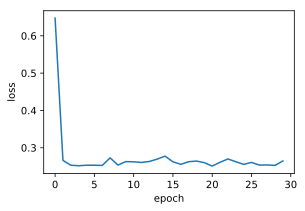

In [37]:
train_sgd(scratch_model, "adagrad", {"learning_rate": 0.1}, 150, 30)

In [ ]:
train_sgd(gluon_model, "adagrad", {"learning_rate": 0.1}, 150, 30)

epoch 1 - train_loss: 0.3149661123752594
epoch 2 - train_loss: 0.27322855591773987
epoch 3 - train_loss: 0.2576671838760376
epoch 4 - train_loss: 0.25076067447662354
epoch 5 - train_loss: 0.2473260909318924
epoch 6 - train_loss: 0.24545779824256897
epoch 7 - train_loss: 0.2443627268075943
epoch 8 - train_loss: 0.24367886781692505
epoch 9 - train_loss: 0.2432279884815216
epoch 10 - train_loss: 0.24291656911373138
epoch 11 - train_loss: 0.2426927536725998
epoch 12 - train_loss: 0.2425263524055481
epoch 13 - train_loss: 0.24239906668663025
epoch 14 - train_loss: 0.24229931831359863
epoch 15 - train_loss: 0.24221953749656677
epoch 16 - train_loss: 0.24215464293956757
epoch 17 - train_loss: 0.2421010583639145
epoch 18 - train_loss: 0.24205628037452698
epoch 19 - train_loss: 0.2420184463262558
epoch 20 - train_loss: 0.2419862002134323
epoch 21 - train_loss: 0.24195851385593414
epoch 22 - train_loss: 0.24193455278873444
epoch 23 - train_loss: 0.24191369116306305
epoch 24 - train_loss: 0.24189

#### RMSProp

In [ ]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1**2
    s2 = gamma * s2 + (1 - gamma) * g2**2
    x1 -= eta * g1 / math.sqrt(s1 + eps)
    x2 -= eta * g2 / math.sqrt(s2 + eps)
    return x1, x2, s1, s2

In [ ]:
eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))

In [ ]:
train_sgd(scratch_model, "rmsprop", {"learning_rate": 0.01, "gamma1": 0.9}, 150, 30)

In [ ]:
train_sgd(gluon_model, "rmsprop", {"learning_rate": 0.01, "gamma1": 0.9}, 150, 30)

#### AdaDelta

In [ ]:
train_sgd(scratch_model, "adadelta", {"rho": 0.9}, 150, 30)

In [ ]:
train_sgd(gluon_model, "adadelta", {"rho": 0.9}, 150, 30)

#### Adam

In [ ]:
train_sgd(scratch_model, "adam", {"learning_rate": 0.01, "t": 1}, 150, 30)

In [ ]:
train_sgd(gluon_model, "adam", {"learning_rate": 0.01}, 150, 30)